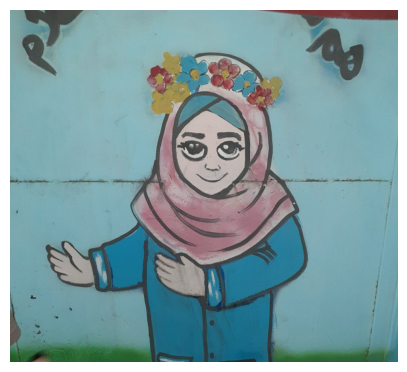

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('pic.jpg'))
B = np.mean (A, -1); # Convert RGB to grayscale

plt.figure()


plt.axis('off')
plt.imshow(A) #, cmap=('gray_r')


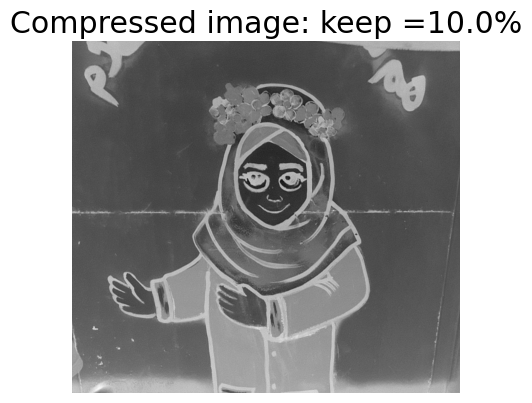

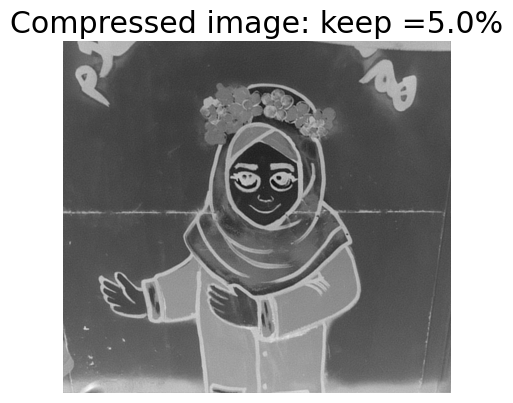

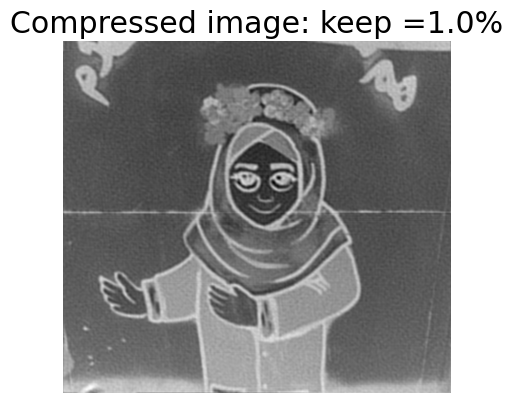

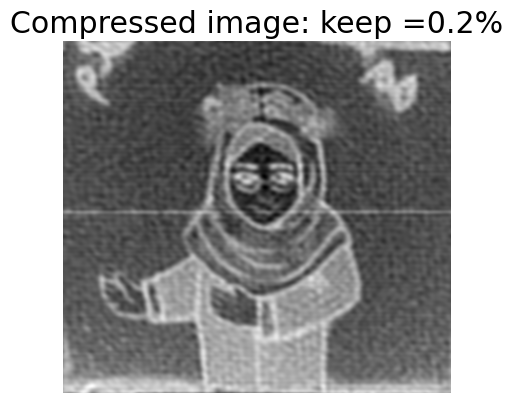

In [2]:
Bt = np.fft.fft2(B)
Btsort= np.sort(np.abs (Bt.reshape(-1))) # sort by magnitude
#Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort [int (np.floor((1-keep)*len (Btsort)))]
    ind = np.abs(Bt)>thresh #Find small indices
    Atlow = Bt * ind #Threshold small indices
    Alow = np.fft.ifft2(Atlow).real # Compressed image
    plt.figure()
    plt.imshow(256-Alow, cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep =' + str(keep*100) + '%')



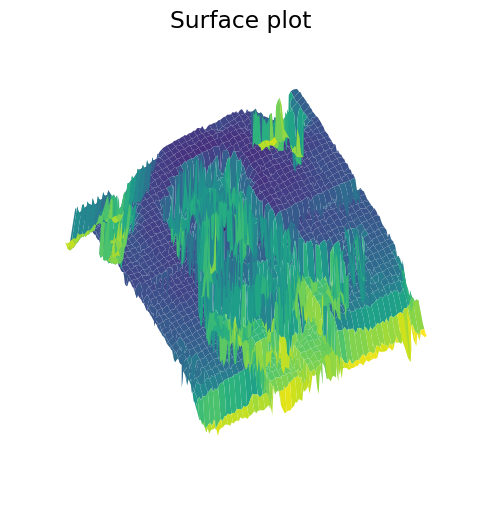

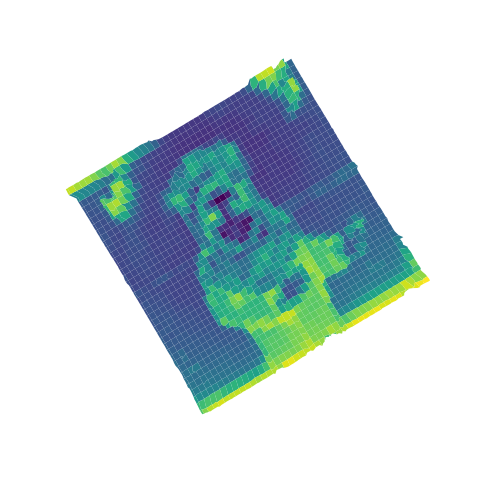

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

plt.rcParams['figure.figsize'] = [6, 6]

# First plot
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(1, np.shape(B)[1] + 1), np.arange(1, np.shape(B)[0] + 1))
ax.plot_surface(X[0::10, 0::10], Y[0::10, 0::10], 256 - B[0::10, 0::10], cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.axis('off')
ax.view_init(120, 60)

# Second plot
fig2 = plt.figure()
ap = fig2.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(1, np.shape(B)[1] + 1), np.arange(1, np.shape(B)[0] + 1))
ap.plot_surface(X[0::10, 0::10], Y[0::10, 0::10], 256 - B[0::10, 0::10], cmap='viridis', edgecolor='none')
ap.set_title('')
ap.axis('off')
ap.view_init(90, 60)

plt.show()


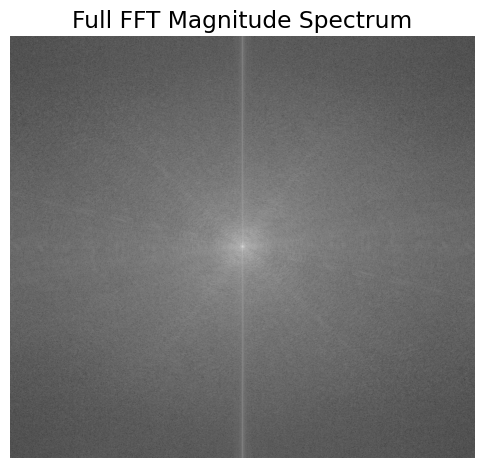

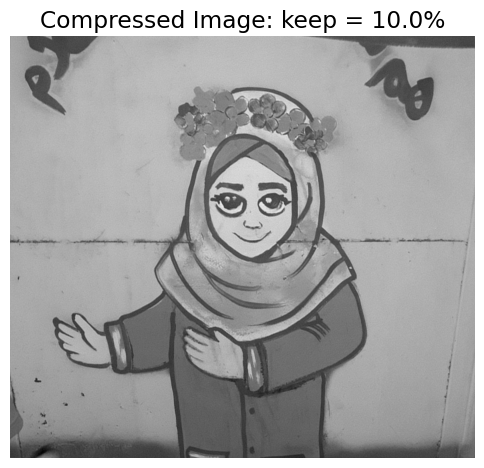

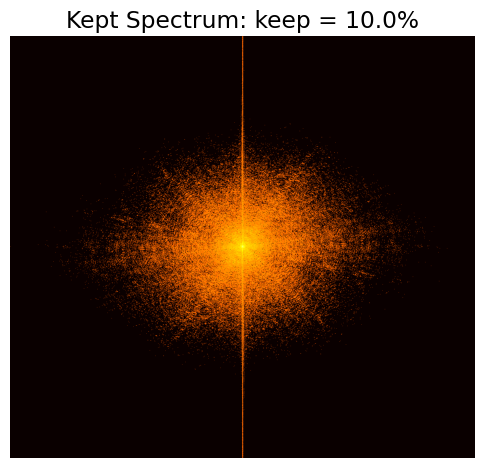

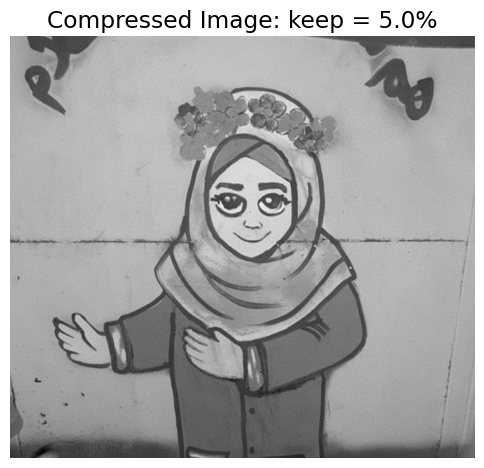

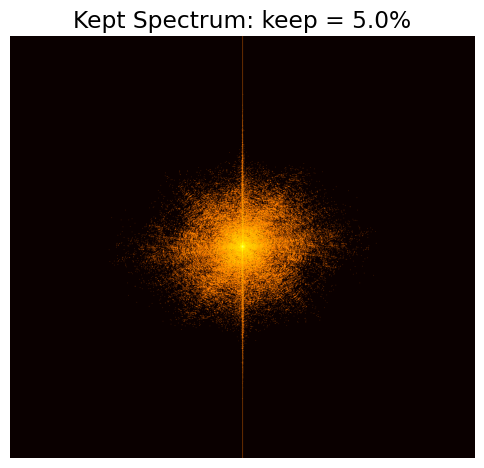

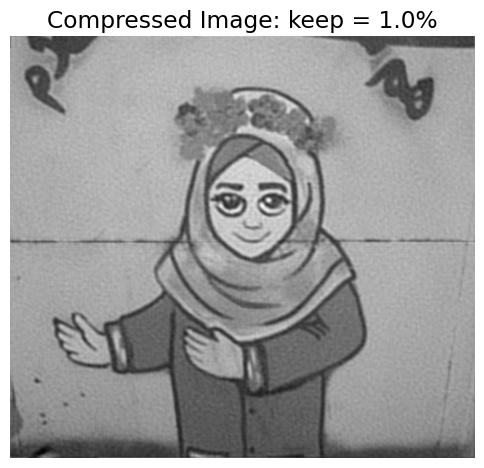

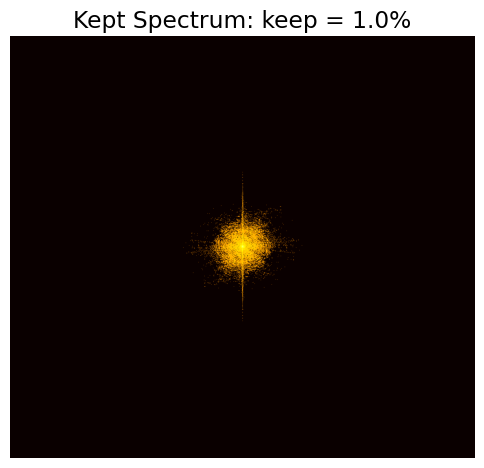

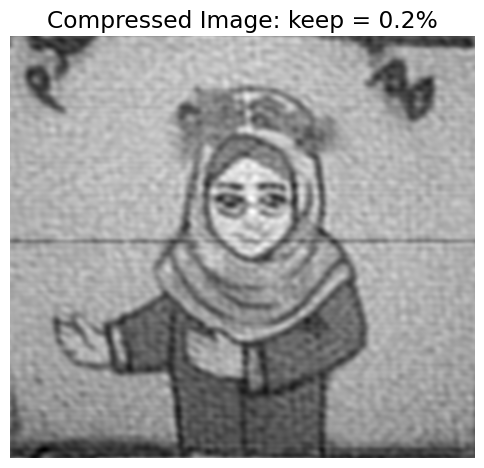

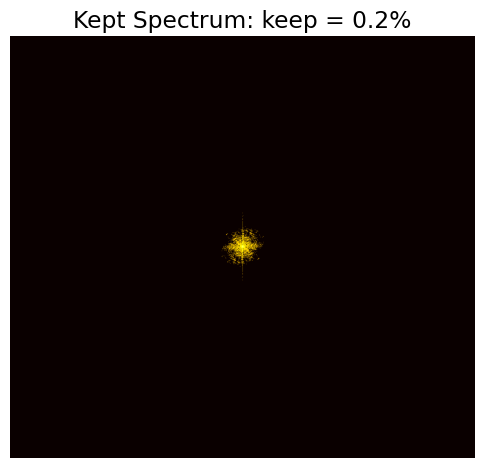

In [4]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 14})

# Load and grayscale
A = imread('pic.jpg')
B = np.mean(A, axis=-1)

# FFT
Bt = np.fft.fft2(B)
Bt_shifted = np.fft.fftshift(Bt)  # Shift zero-frequency component to center
magnitude_spectrum = np.log(1 + np.abs(Bt_shifted))

# Plot full spectrum
plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Full FFT Magnitude Spectrum')
plt.axis('off')

# Flatten and sort coefficients
Bt_flat = np.abs(Bt).reshape(-1)
Btsort = np.sort(Bt_flat)

# Compression visualizations
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1 - keep) * len(Btsort)))]
    mask = np.abs(Bt) > thresh
    Bt_compressed = Bt * mask
    B_reconstructed = np.fft.ifft2(Bt_compressed).real

    # Plot compressed image
    plt.figure()
    plt.imshow(np.clip(B_reconstructed, 0, 255), cmap='gray')
    plt.axis('off')
    plt.title(f'Compressed Image: keep = {keep*100:.1f}%')

    # Plot kept coefficient spectrum
    Bt_kept_shifted = np.fft.fftshift(mask * Bt)
    spectrum_kept = np.log(1 + np.abs(Bt_kept_shifted))

    plt.figure()
    plt.imshow(spectrum_kept, cmap='hot')
    plt.title(f'Kept Spectrum: keep = {keep*100:.1f}%')
    plt.axis('off')
